# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import IPython.display as ipd #this will help in displaying some of the graphs
from scipy.io import wavfile as wav

In [2]:
#read file
filename = 'C:/Users/hp/Desktop/projects_git/Sound_classification/bicycle-horn.wav'

# Exploratory Data analysis

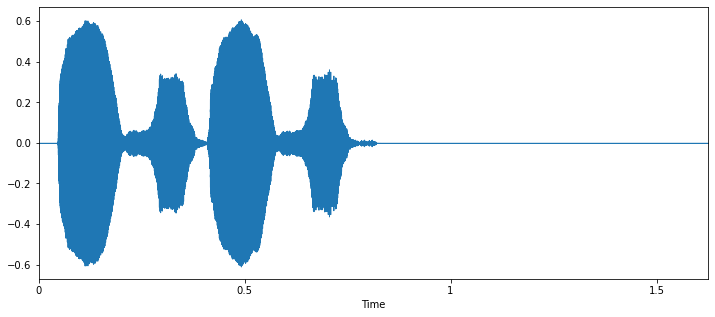

In [3]:
#bicycle horn
plt.figure(figsize = (12, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filename) #this will help us load the audio which is in form of the wave file


In [4]:
sample_rate #print sample rate which is the total number of times a sound is sampled per second

22050

In [5]:
wave_sample_rate, wave_audio = wav.read(filename)

In [6]:
wave_sample_rate

44100

In [7]:
wave_audio #wave values using scipy

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [8]:
data #wave values using librosa

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [9]:
#read our metadata
metadata = pd.read_csv('C:/Users/hp/Desktop/projects_git/Sound_classification/metadata/horns.csv')

In [10]:
metadata.head(10)

,slice_file_name,fold,classID,class
0,car-horn.wav,1,1,car-horn
1,car-horn2.wav,1,1,car-horn
2,car-horn3.wav,1,1,car-horn
3,car-horn4.wav,1,1,car-horn
4,car-horn5.wav,1,1,car-horn
5,car-horn6.wav,1,1,car-horn
6,car-horn7.wav,1,1,car-horn
7,car-horn8.wav,1,1,car-horn
8,bicycle-horn.wav,2,2,bicycle-horn
9,bicycle-horn2.wav,2,2,bicycle-horn


In [11]:
metadata['class'].value_counts()

car-horn        8
ship-horn       7
bicycle-horn    7
truck-horn      7
train-horn      6
Name: class, dtype: int64

# Audio Classification Data Preprocessing

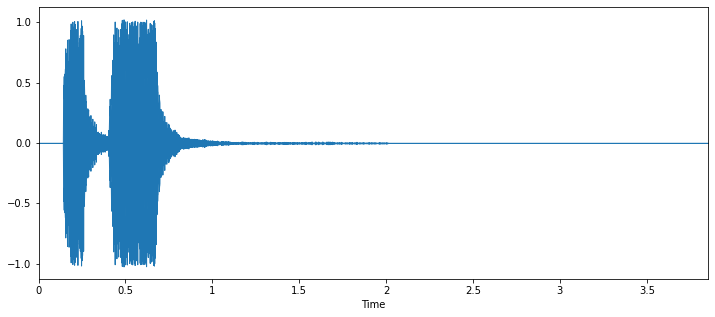

In [12]:
#car horn
filename = 'C:/Users/hp/Desktop/projects_git/Sound_classification/car-horn.wav'
plt.figure(figsize = (12, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filename) #this will help us load the audio which is in form of the wave file


In [13]:
librosa_audio_data, librosa_sample_rate = librosa.load(filename)
print(librosa_audio_data)

[0. 0. 0. ... 0. 0. 0.]


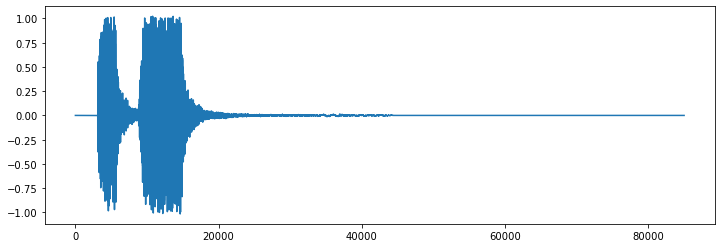

In [14]:
###plotting the librosa audio data
#Original audio with 1 channel
plt.figure(figsize = (12, 4))
plt.plot(librosa_audio_data)

##### Observation: Librosa converts the signal to mono, meanin the channels will always be 1

# Extract Features
##### Here I'll be using Mel-Frequency Cepstral Coefficients(MFCC) rom the audio samples. The MFCX summarizes the frequency distribution acros the window size, so it is possible to analyse both the frequency and the characteristics of the sound. These audio representatons will allow us identify features for classification

In [15]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 167)


In [16]:
mfccs # mfccs for one file

array([[-557.6794, -557.6794, -557.6794, ..., -557.6794, -557.6794,
        -557.6794],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [17]:
import os

audio_dataset_path = 'C:/Users/hp/Desktop/projects_git/Sound_classification/audio'
metadata = pd.read_csv('C:/Users/hp/Desktop/projects_git/Sound_classification/metadata/horns.csv')
metadata.head(10)

,slice_file_name,fold,classID,class
0,car-horn.wav,1,1,car-horn
1,car-horn2.wav,1,1,car-horn
2,car-horn3.wav,1,1,car-horn
3,car-horn4.wav,1,1,car-horn
4,car-horn5.wav,1,1,car-horn
5,car-horn6.wav,1,1,car-horn
6,car-horn7.wav,1,1,car-horn
7,car-horn8.wav,1,1,car-horn
8,bicycle-horn.wav,2,2,bicycle-horn
9,bicycle-horn2.wav,2,2,bicycle-horn


In [18]:
#funtion that extract the features for one file
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    return mfccs_scaled_features

In [19]:
!pip install tqdm

In [20]:
import numpy as np
from tqdm import tqdm

#Now we iterate through every audio file and extract features
##using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '\\', str(row["slice_file_name"]))
    final_class_labels = row['class']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels]) 

35it [00:06,  5.46it/s]


In [21]:
##Convert extracted features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-445.63647, 35.62825, 2.0868604, 5.864677, -2...",car-horn
1,"[-462.33615, 44.614296, -12.925322, 4.691734, ...",car-horn
2,"[-668.2033, 9.244003, -8.526812, -2.0135775, -...",car-horn
3,"[-584.5326, 29.810001, -15.089794, 2.314306, -...",car-horn
4,"[-437.33206, 40.018356, -34.43043, 3.1237345, ...",car-horn


In [60]:
x = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [61]:
x.shape

(35, 40)

In [62]:
#label encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [25]:
##train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [63]:
y.shape

(35, 5)

In [65]:
y

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [64]:
x_train

array([[-668.2033   ,    9.244003 ,   -8.526812 , ...,   -5.6404696,
          -2.1704822,    6.380179 ],
       [-356.17044  ,    4.8667707,  -65.08579  , ...,   -2.3681905,
         -11.843931 ,   12.172477 ],
       [ -96.299774 ,   58.201534 ,  -33.43035  , ...,   10.645615 ,
           2.7435606,    5.466318 ],
       ...,
       [-298.67477  ,  105.05768  ,  -54.780983 , ...,   -3.178722 ,
          -1.2736768,   -3.4255598],
       [-584.5326   ,   29.810001 ,  -15.089794 , ...,   -0.820198 ,
          11.763623 ,    3.473014 ],
       [-445.63647  ,   35.62825  ,    2.0868604, ...,   -4.780227 ,
           4.249857 ,    6.8388696]], dtype=float32)

In [27]:
y_train

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [28]:
x_train.shape

(28, 40)

In [29]:
x_test.shape

(7, 40)

In [30]:
y_train.shape

(28, 5)

In [31]:
y_test.shape

(7, 5)

## Model Creation

In [32]:
#import libraries
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


In [33]:
#number of classes
num_labels = y.shape[1]

In [34]:
model = Sequential()
#first layer
model.add(Dense(10, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#second layer
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                410       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                3

In [36]:
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'], 
              optimizer = 'adam')

In [37]:
##Model training

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [38]:
num_epochs = 3

In [39]:
num_batch_size = 2

In [40]:
checkpointer = ModelCheckpoint(filepath = 'C:/Users/hp/Desktop/projects_git/Sound_classification/horn_classification.hdf5',
                               verbose = 1,
                               save_best_only = True)


In [41]:
start = datetime.now()
model.fit(x_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (x_test, y_test), callbacks = [checkpointer])
duration = datetime.now() - start
print('Training completed in time: ', duration)

Train on 28 samples, validate on 7 samples
Epoch 1/3
 2/28 [=>............................] - ETA: 10s - loss: 39.5419 - accuracy: 0.0000e+00
Epoch 00001: val_loss improved from inf to 4.07125, saving model to C:/Users/hp/Desktop/projects_git/Sound_classification/horn_classification.hdf5
28/28 [==============================] - 1s 37ms/sample - loss: 35.0486 - accuracy: 0.1429 - val_loss: 4.0713 - val_accuracy: 0.4286
Epoch 2/3
 2/28 [=>............................] - ETA: 0s - loss: 32.2259 - accuracy: 0.0000e+00
Epoch 00002: val_loss improved from 4.07125 to 3.55729, saving model to C:/Users/hp/Desktop/projects_git/Sound_classification/horn_classification.hdf5
28/28 [==============================] - 0s 3ms/sample - loss: 31.0772 - accuracy: 0.0714 - val_loss: 3.5573 - val_accuracy: 0.4286
Epoch 3/3
 2/28 [=>............................] - ETA: 0s - loss: 2.9818 - accuracy: 0.5000
Epoch 00003: val_loss improved from 3.55729 to 3.02049, saving model to C:/Users/hp/Desktop/projects_git

In [42]:
#test accuracy
test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(test_accuracy[1])

0.42857143


In [43]:
#test file
filename = 'C:/Users/hp/Desktop/projects_git/Sound_classification/ship-horn3.wav'

In [44]:
prediction_feature = features_extractor(filename) #extract features using the earlier built feature extractor function

In [47]:
#reshape prediction_feature
prediction_feature.reshape(1, -1)

array([[-3.8244318e+02,  1.1185689e+02, -2.1351919e+01,  1.9306784e+01,
        -1.7175640e+01,  4.6910334e+00, -1.0777460e+01, -6.2197101e-01,
        -5.0055013e+00, -7.9077888e+00, -4.2978854e+00, -2.2003265e-01,
         6.1593747e-01,  5.5484662e+00, -2.6318858e+00, -5.3126764e-01,
        -4.5293126e+00, -6.8955097e+00, -5.3832912e+00, -7.9439898e+00,
        -8.5527105e+00, -3.9276159e+00, -1.4346436e+01, -3.3259587e+00,
        -5.0970259e+00,  6.2863297e+00,  1.2850398e+01,  1.6223730e+01,
         5.4860587e+00, -2.5808318e+00, -1.0594927e+01, -1.4440252e+01,
        -4.5961680e+00,  2.3637016e+00,  2.3692942e+00,  3.0450673e+00,
         2.5150688e+00, -1.9913942e-01,  4.2429800e+00, -3.2689232e-01]],
      dtype=float32)

In [48]:
prediction_feature.reshape(1, -1).shape

(1, 40)

In [50]:
#make prediction
prediction_feature = prediction_feature.reshape(1, -1)
model.predict_classes(prediction_feature)

array([2], dtype=int64)

In [69]:
#predict a sample ship horn
filename = 'C:/Users/hp/Desktop/projects_git/Sound_classification/ship-horn3.wav'

#extract features
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features) #print scaled features
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features) #print scaled features
print(mfccs_scaled_features.shape)
predicted_label = model.predict_classes(mfccs_scaled_features)
print(predicted_label) #print predicted label
prediction_class = labelencoder.inverse_transform(predicted_label) #use inverse transform to get the class name
prediction_class

[-117.12598     141.75977     -28.31174      49.713078     -0.81250006
   29.445414      4.0727477     8.888035     -5.539476      9.813189
   -4.7525525     2.5114343    -8.376359      1.6486169   -11.236569
   -3.5424883    -7.671317     -6.1245003    -4.6275887    -5.0928392
   -5.5367436    -2.774003     -3.0460114    -6.1656685    -4.493226
   -6.991095     -3.2832046    -3.4612038    -3.8211803    -6.164386
   -3.4585476    -3.1073232    -4.4288774    -6.1971593    -3.1219678
   -5.307391     -2.6616511    -4.600822     -4.9317575    -4.8995667 ]
[[-117.12598     141.75977     -28.31174      49.713078     -0.81250006
    29.445414      4.0727477     8.888035     -5.539476      9.813189
    -4.7525525     2.5114343    -8.376359      1.6486169   -11.236569
    -3.5424883    -7.671317     -6.1245003    -4.6275887    -5.0928392
    -5.5367436    -2.774003     -3.0460114    -6.1656685    -4.493226
    -6.991095     -3.2832046    -3.4612038    -3.8211803    -6.164386
    -3.4585476    

array(['ship-horn'], dtype='<U12')